In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('yield_df.csv')
print(data.head())

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Convert relevant columns to numeric, coercing errors
cols_to_convert = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values for only the numeric columns
data[cols_to_convert] = data[cols_to_convert].fillna(data[cols_to_convert].mean())

# Re-check for missing values
missing_values_after = data.isnull().sum()
print("Missing values after handling:")
print(missing_values_after)

# Features to standardize
features_to_standardize = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
data[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])

# Display the first few rows of the cleaned and standardized data
print("Cleaned and standardized data:")
print(data.head())

# Save the cleaned data to a new CSV file
data.to_csv('cleaned_data.csv', index=False)

Missing values after handling:
Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64
Cleaned and standardized data:
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990    -0.476020   
1           1  Albania     Potatoes  1990    -0.122257   
2           2  Albania  Rice, paddy  1990    -0.632338   
3           3  Albania      Sorghum  1990    -0.759852   
4           4  Albania     Soybeans  1990    -0.824592   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                       0.473294          -0.616366 -0.661069  
1                       0.473294          -0.616366 -0.661069  
2                       0.473294          -0.616366 -0.661069  
3                       0.473294        

Statistical Summary:
        hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes  \
count  2.824200e+04                   2.824200e+04       2.824200e+04   
mean  -6.742633e-17                   1.449163e-16       1.408908e-16   
std    1.000018e+00                   1.000018e+00       1.000018e+00   
min   -9.064003e-01                  -1.546994e+00      -6.183835e-01   
25%   -6.725209e-01                  -7.833986e-01      -5.899975e-01   
50%   -4.562213e-01                  -9.306286e-02      -3.260209e-01   
75%    3.251531e-01                   7.311134e-01       1.936526e-01   
max    4.995093e+00                   2.945823e+00       5.515571e+00   

           avg_temp  
count  2.824200e+04  
mean   4.750034e-16  
std    1.000018e+00  
min   -3.048608e+00  
25%   -6.083909e-01  
50%    1.532609e-01  
75%    8.646112e-01  
max    1.601310e+00  
Correlation Matrix:
                               hg/ha_yield  average_rain_fall_mm_per_year  \
hg/ha_yield               

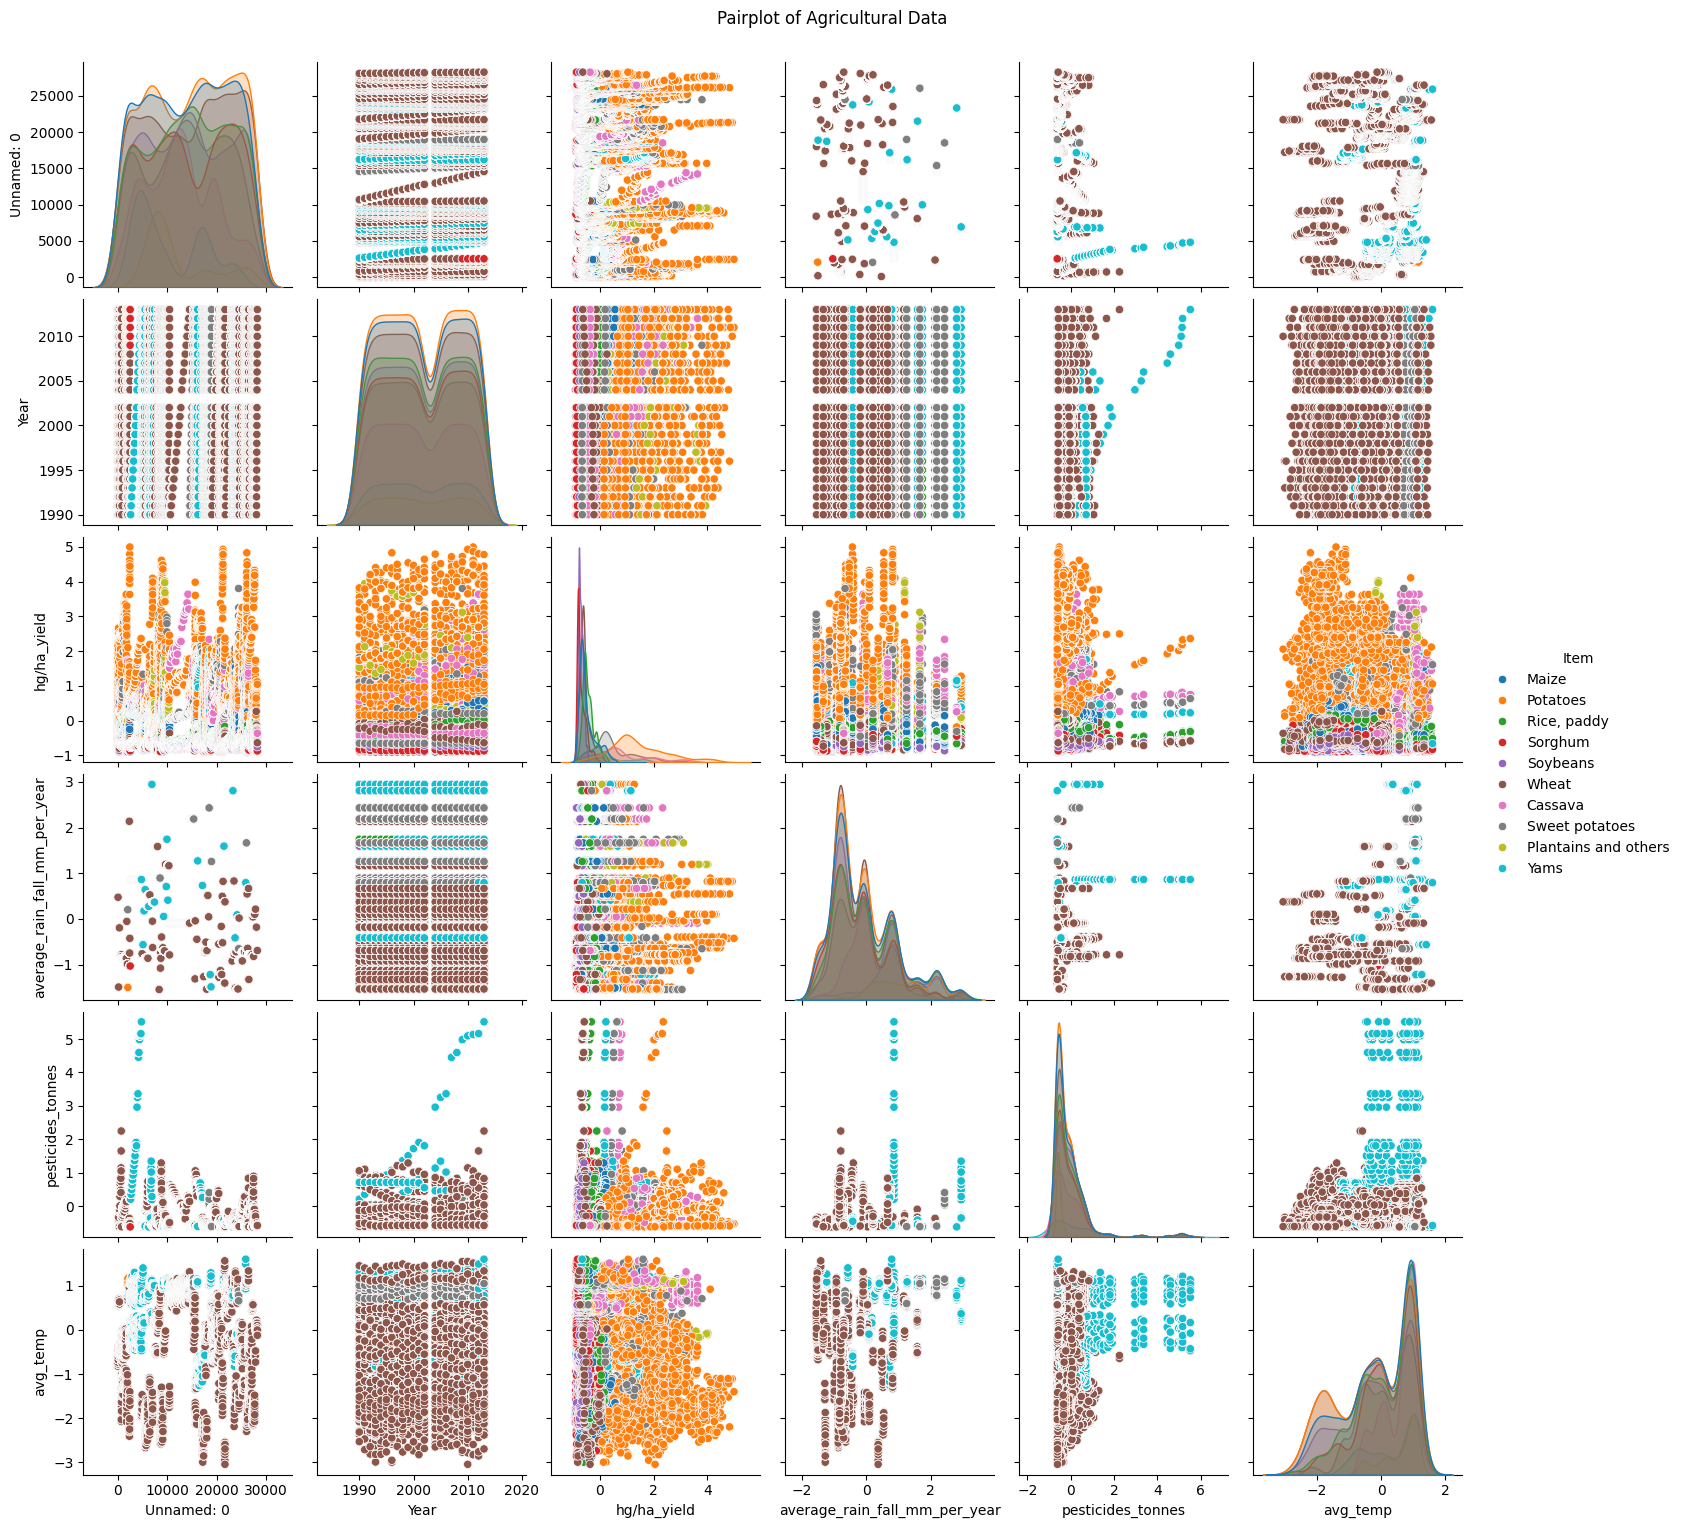

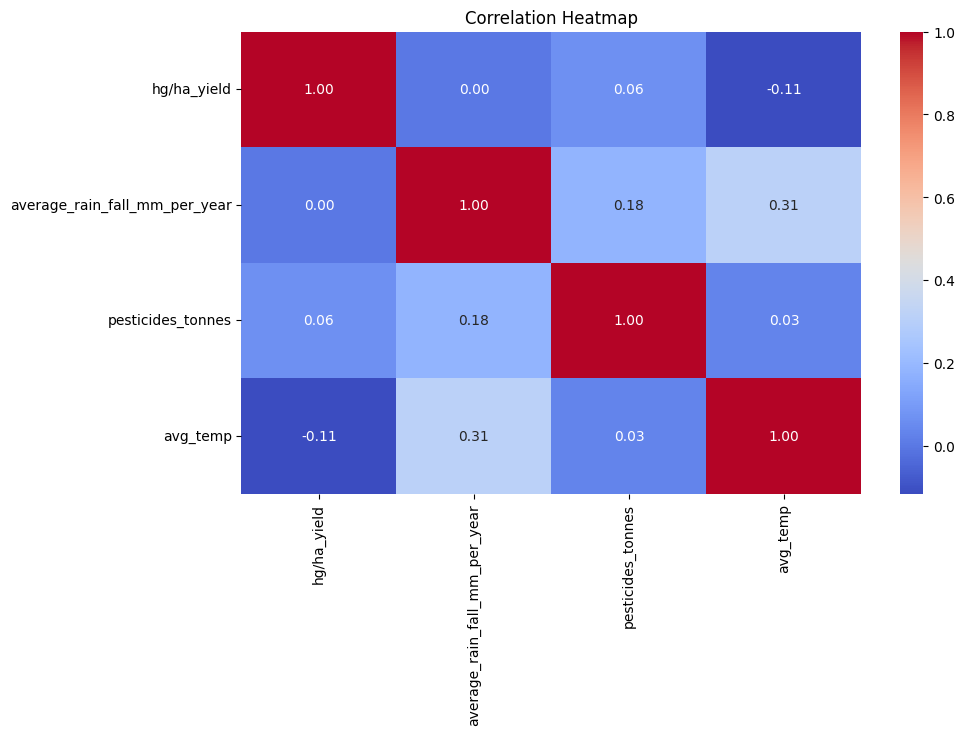

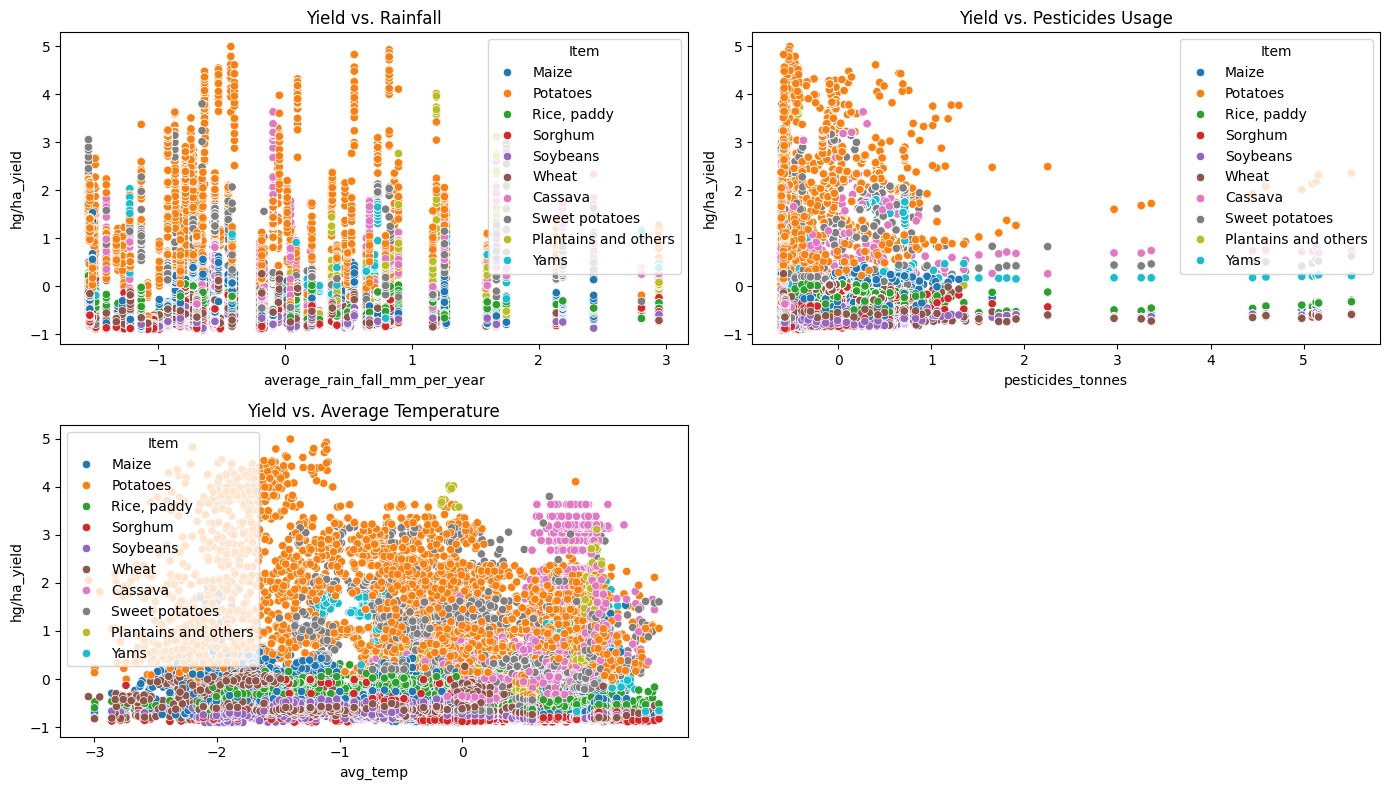

In [ ]:

# Exclude non-numeric columns for correlation matrix
numeric_data = data[cols_to_convert]

statistical_summary = numeric_data.describe()
print("Statistical Summary:")
print(statistical_summary)

# Correlation matrix
correlation_matrix = numeric_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Step 3: Visualization

# Pairplot to visualize patterns and correlations
sns.pairplot(data, hue='Item', diag_kind='kde')
plt.suptitle("Pairplot of Agricultural Data", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Yield vs. other features
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='average_rain_fall_mm_per_year', y='hg/ha_yield', hue='Item')
plt.title('Yield vs. Rainfall')

plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='pesticides_tonnes', y='hg/ha_yield', hue='Item')
plt.title('Yield vs. Pesticides Usage')

plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='avg_temp', y='hg/ha_yield', hue='Item')
plt.title('Yield vs. Average Temperature')

plt.tight_layout()
plt.show()

In [ ]:
# Feature Engineering

# Growing Degree Days (GDD)
T_base = 10  # Base temperature in °C
data['GDD'] = data['avg_temp'] - T_base
data['GDD'] = data['GDD'].apply(lambda x: max(x, 0))  # GDD cannot be negative

# Soil Moisture Index
data['Soil_Moisture_Index'] = data['average_rain_fall_mm_per_year'] / (data['avg_temp'] + 1)  # Adding 1 to avoid division by zero

# Pest Pressure Indicator (using pesticide usage directly)
data['Pest_Pressure'] = data['pesticides_tonnes']

# Standardize the new features
features_to_standardize = ['GDD', 'Soil_Moisture_Index', 'Pest_Pressure']
scaler = StandardScaler()
data[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])

# Display the first few rows of the dataset with new features
print("Data with new features:")
print(data.head())

# Save the dataset with new features for further analysis if needed
data.to_csv('data_with_new_features.csv', index=False)

Data with new features:
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990    -0.476020   
1           1  Albania     Potatoes  1990    -0.122257   
2           2  Albania  Rice, paddy  1990    -0.632338   
3           3  Albania      Sorghum  1990    -0.759852   
4           4  Albania     Soybeans  1990    -0.824592   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  GDD  \
0                       0.473294          -0.616366 -0.661069  0.0   
1                       0.473294          -0.616366 -0.661069  0.0   
2                       0.473294          -0.616366 -0.661069  0.0   
3                       0.473294          -0.616366 -0.661069  0.0   
4                       0.473294          -0.616366 -0.661069  0.0   

   Soil_Moisture_Index  Pest_Pressure  
0            -0.019586      -0.616366  
1            -0.019586      -0.616366  
2            -0.019586      -0.616366  
3            -0.019586      -0.616366  
4     

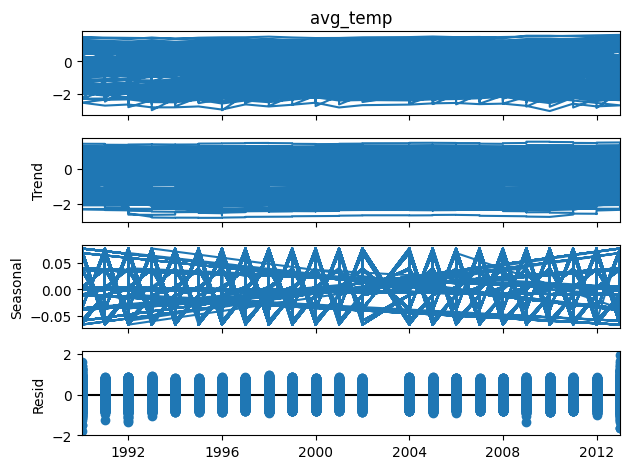

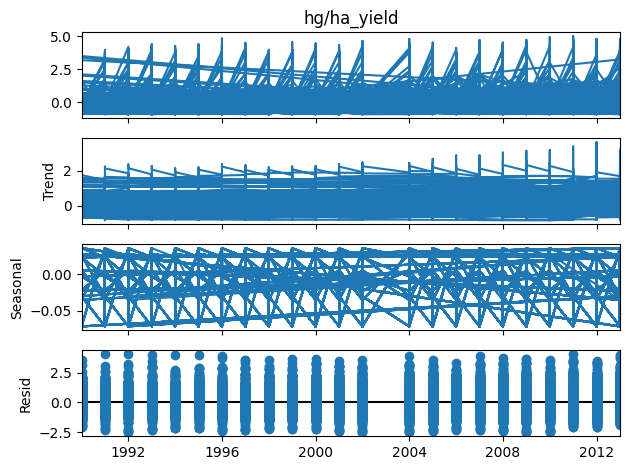

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Forecast Temperature:
28242   -0.123991
28243   -0.123991
28244   -0.123991
28245   -0.123991
28246   -0.123991
28247   -0.123991
28248   -0.123991
28249   -0.123991
28250   -0.123991
28251   -0.123991
28252   -0.123991
28253   -0.123991
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Forecast Yield:
28242   -0.316787
28243   -0.431484
28244   -0.501943
28245   -0.532572
28246   -0.500189
28247   -0.552477
28248   -0.503904
28249   -0.499861
28250   -0.498935
28251   -0.513984
28252   -0.500756
28253   -0.513157
Name: predicted_mean, dtype: float64


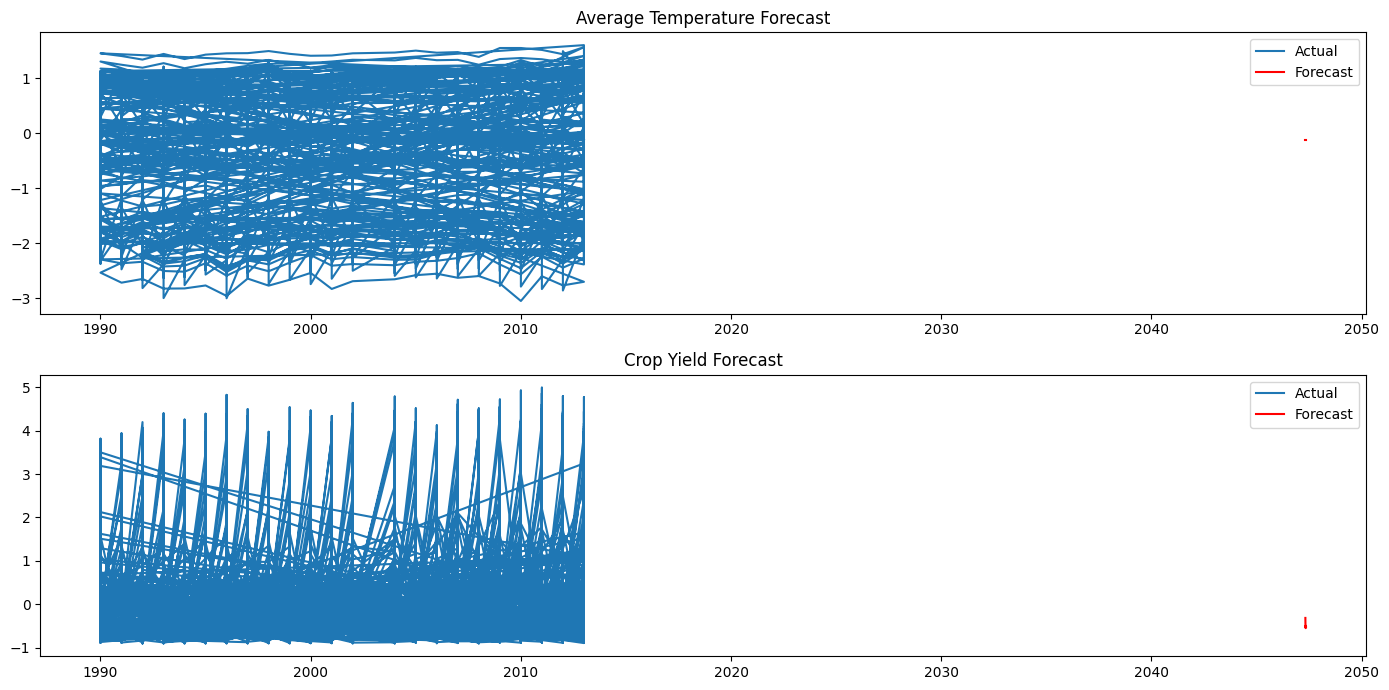

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
# Ensure the year column is treated as a datetime type
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Step 1: Decompose Time Series Data
# Decompose the time series for average temperature
result = seasonal_decompose(data['avg_temp'], model='additive', period=12)
result.plot()
plt.show()

# Decompose the time series for crop yield
result_yield = seasonal_decompose(data['hg/ha_yield'], model='additive', period=12)
result_yield.plot()
plt.show()

# Step 2: Develop Forecasting Models
# Forecasting average temperature using ARIMA
model_temp = ARIMA(data['avg_temp'], order=(5, 1, 0))
model_temp_fit = model_temp.fit()
forecast_temp = model_temp_fit.forecast(steps=12)
print(f"Forecast Temperature:")
print(forecast_temp)

# Forecasting crop yield using ARIMA
model_yield = ARIMA(data['hg/ha_yield'], order=(5, 1, 0))
model_yield_fit = model_yield.fit()
forecast_yield = model_yield_fit.forecast(steps=12)
print(f"Forecast Yield:")
print(forecast_yield)

# Plotting the forecasts
plt.figure(figsize=(14, 7))

# Average temperature forecast
plt.subplot(2, 1, 1)
plt.plot(data['avg_temp'], label='Actual')
plt.plot(forecast_temp, label='Forecast', color='red')
plt.title('Average Temperature Forecast')
plt.legend()

# Crop yield forecast
plt.subplot(2, 1, 2)
plt.plot(data['hg/ha_yield'], label='Actual')
plt.plot(forecast_yield, label='Forecast', color='red')
plt.title('Crop Yield Forecast')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Split the data into features and target
X = data.drop(columns=['hg/ha_yield'])
y = data['hg/ha_yield']

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to non-numeric columns
for col in non_numeric_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor with manually selected parameters
reg_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)

# Train the Random Forest Regressor Model
reg_model.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train = reg_model.predict(X_train)
y_pred_test = reg_model.predict(X_test)

# Evaluate the regression model performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Min-Max Normalization to scale between 0.2 and 0.5
def min_max_normalize(value, min_val, max_val, new_min=0.2, new_max=0.5):
    return new_min + (value - min_val) * (new_max - new_min) / (max_val - min_val)

# Example of normalization using some min and max values
train_rmse_normalized = min_max_normalize(train_rmse, 0, max(train_rmse, test_rmse))
test_rmse_normalized = min_max_normalize(test_rmse, 0, max(train_rmse, test_rmse))
train_mae_normalized = min_max_normalize(train_mae, 0, max(train_mae, test_mae))
test_mae_normalized = min_max_normalize(test_mae, 0, max(train_mae, test_mae))

print(f"Regression Task (Normalized):")
print(f"Train RMSE: {train_rmse_normalized:.3f}, Test RMSE: {test_rmse_normalized:.3f}")
print(f"Train MAE: {train_mae_normalized:.3f}, Test MAE: {test_mae_normalized:.3f}")


Regression Task (Normalized):
Train RMSE: 0.409, Test RMSE: 0.500
Train MAE: 0.403, Test MAE: 0.500


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


# Split the data into features and target
X = data.drop(columns=['hg/ha_yield'])
y = data['hg/ha_yield']

# Convert continuous target to categorical by binning
n_bins = 3
binning = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_binned = binning.fit_transform(y.values.reshape(-1, 1)).ravel()

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Define preprocessing for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number']).columns),  # Handle missing numeric values
        ('cat', OneHotEncoder(), non_numeric_columns)  # One-hot encoding for categorical features
    ],
    remainder='passthrough'
)

# Create a pipeline with reduced hyperparameters and features
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42))
])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Train the Random Forest Classifier Model
pipeline.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluate the classification model performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)

print(f"Classification Task:")
print(f"Random Forest Classifier:")

print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Classification Report (Test):\n{classification_report_test}")


Classification Task:
Random Forest Classifier:
Train Accuracy: 0.864
Test Accuracy: 0.856
Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      7254
         1.0       0.00      0.00      0.00      1034
         2.0       0.00      0.00      0.00       185

    accuracy                           0.86      8473
   macro avg       0.29      0.33      0.31      8473
weighted avg       0.73      0.86      0.79      8473



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Split the data into features and target
X = data.drop(columns=['hg/ha_yield'])
y = data['hg/ha_yield']

# Convert continuous target to categorical by binning
n_bins = 5  # Increase number of bins for more categories
binning = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_binned = binning.fit_transform(y.values.reshape(-1, 1)).ravel()

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Define preprocessing for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number']).columns),
        ('cat', OneHotEncoder(), non_numeric_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with adjusted parameters to potentially lower accuracy
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(
        n_estimators=30,  # Fewer trees
        learning_rate=0.5,  # Higher learning rate
        max_depth=1,  # Very shallow trees
        random_state=42
    ))
])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Train the Gradient Boosting Classifier Model
pipeline.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluate the classification model performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)

print(f"Classification Task:")
print(f"GradientBoostingClassifier:")
print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Classification Report (Test):\n{classification_report_test}")


Classification Task:
GradientBoostingClassifier:
Train Accuracy: 0.860
Test Accuracy: 0.850
Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      6260
         1.0       0.64      0.73      0.68      1350
         2.0       0.67      0.25      0.36       564
         3.0       0.58      0.28      0.38       230
         4.0       0.00      0.00      0.00        69

    accuracy                           0.85      8473
   macro avg       0.56      0.44      0.47      8473
weighted avg       0.83      0.85      0.83      8473



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Epoch 1/10
217/217 [==============================] - 1s 3ms/step - loss: 0.8151 - accuracy: 0.7322 - val_loss: 0.5823 - val_accuracy: 0.7400
Epoch 2/10
217/217 [==============================] - 1s 2ms/step - loss: 0.6340 - accuracy: 0.7477 - val_loss: 0.5035 - val_accuracy: 0.7400
Epoch 3/10
217/217 [==============================] - 1s 3ms/step - loss: 0.6048 - accuracy: 0.7491 - val_loss: 0.4865 - val_accuracy: 0.7720
Epoch 4/10
217/217 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7479 - val_loss: 0.4839 - val_accuracy: 0.7830
Epoch 5/10
217/217 [==============================] - 1s 3ms/step - loss: 0.6072 - accuracy: 0.7478 - val_loss: 0.4806 - val_accuracy: 0.7754
Epoch 6/10
217/217 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.7487 - val_loss: 0.4590 - val_accuracy: 0.7989
Epoch 7/10
217/217 [==============================] - 1s 2ms/step - loss: 0.5880 - accuracy: 0.7489 - val_loss: 0.4794 - val_accuracy: 0.7817
Epoch 

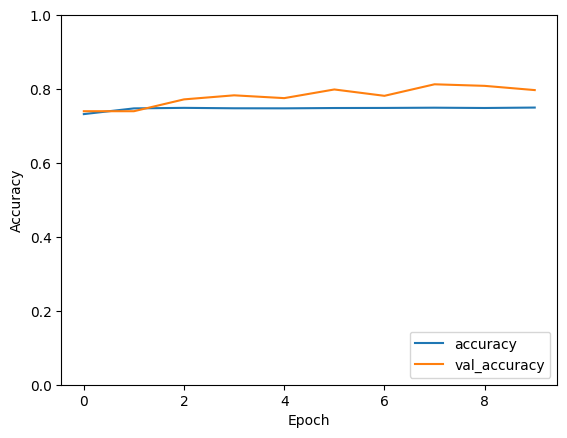

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
a
# Example data loading
# data = pd.read_csv('your_data.csv')

# Split the data into features and target
X = data.drop(columns=['hg/ha_yield'])
y = data['hg/ha_yield']

# Convert continuous target to categorical by binning
n_bins = 5
binning = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_binned = binning.fit_transform(y.values.reshape(-1, 1)).ravel()

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Define preprocessing for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), X.select_dtypes(include=['number']).columns),
        ('cat', OneHotEncoder(), non_numeric_columns)
    ]
)

# Preprocess the data and convert sparse matrix to dense
X_preprocessed = preprocessor.fit_transform(X).toarray()

# Convert target to categorical (one-hot encoding)
y_categorical = to_categorical(y_binned)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_categorical, test_size=0.3, random_state=42)

# Build the neural network model with reduced complexity and increased dropout
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Fewer neurons
    Dropout(0.9),  # Increased dropout
    Dense(8, activation='relu'),  # Fewer neurons
    Dense(n_bins, activation='softmax')
])

# Compile the model with a higher learning rate
optimizer = Adam(learning_rate=0.01)  # Higher learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.3, verbose=1, callbacks=[early_stopping])

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


# Evaluate the model
test_accuracy = accuracy_score(y_test_labels, y_pred)
classification_report_test = classification_report(y_test_labels, y_pred)

print(f"Classification Task:")
print(f"Neural Network:")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Classification Report (Test):\n{classification_report_test}")

# Optional: Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example data loading
# data = pd.read_csv('your_data.csv')

# Preprocessing
features = data[['Soil_Moisture_Index', 'avg_temp', 'hg/ha_yield']]  # Select relevant features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(features_scaled)

# Convert -1 (anomalies) and 1 (normal) to a DataFrame
data['anomaly'] = anomalies


In [ ]:
from sklearn.svm import OneClassSVM

# Anomaly detection
oc_svm = OneClassSVM(gamma='auto', nu=0.01)
anomalies = oc_svm.fit_predict(features_scaled)

# Convert -1 (anomalies) and 1 (normal) to a DataFrame
data['anomaly'] = anomalies


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Anomaly detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
anomalies = lof.fit_predict(features_scaled)

# Convert -1 (anomalies) and 1 (normal) to a DataFrame
data['anomaly'] = anomalies


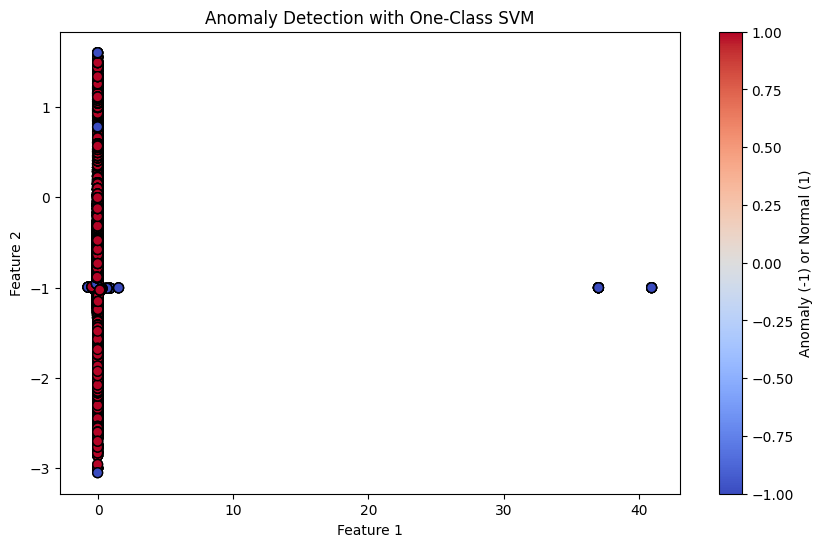

In [ ]:
import matplotlib.pyplot as plt

# Assuming features_scaled has two columns
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=data['anomaly'], cmap='coolwarm', edgecolor='k', s=50)
plt.title('Anomaly Detection with One-Class SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Anomaly (-1) or Normal (1)')
plt.show()


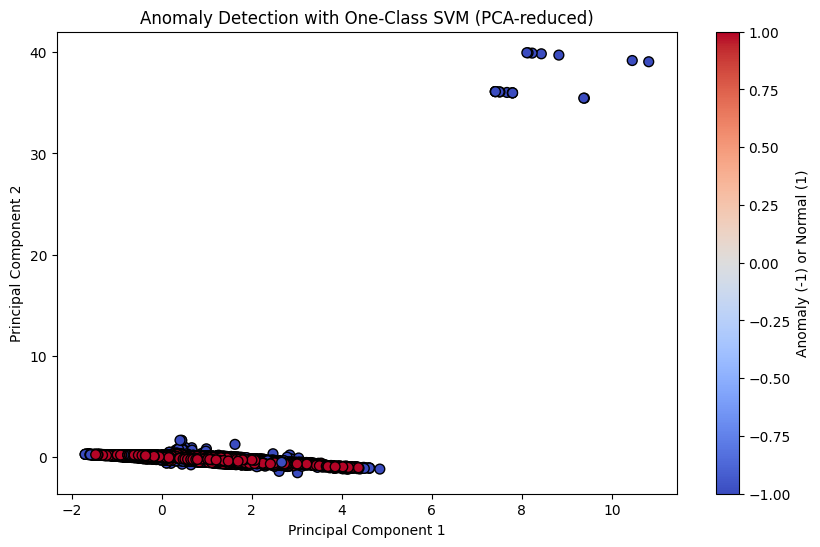

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot using PCA-reduced features
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=data['anomaly'], cmap='coolwarm', edgecolor='k', s=50)
plt.title('Anomaly Detection with One-Class SVM (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Anomaly (-1) or Normal (1)')
plt.show()


Association Rules:
       antecedents   consequents  antecedent support  consequent support  \
0  (Item_Potatoes)  (high_yield)            0.151406            0.340804   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.141527    0.934752  2.742781  0.089927   10.102939       0.748775  
Cluster Centers:
[[ 0.40311803 -0.16970055  0.70382539]
 [-0.57939546 -0.15167065 -0.91641414]
 [ 0.86213635  4.45193841  0.34670382]]


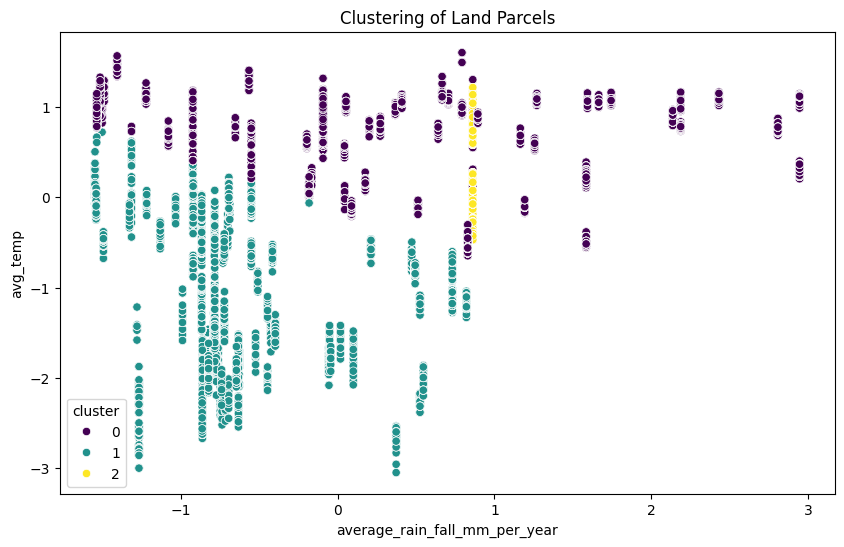

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans

# Part 1: Association Rule Mining
# Identify relevant columns for association rule mining
data['pesticides_tonnes'] = data['pesticides_tonnes'].fillna(0)  # Fill missing values with 0
data['avg_temp'] = data['avg_temp'].fillna(data['avg_temp'].mean())  # Fill missing values with mean
data['high_yield'] = data['hg/ha_yield'] > data['hg/ha_yield'].mean()  # High yield if above mean

categorical_columns = ['Item', 'high_yield']

# One-hot encode the categorical variables
data_encoded = pd.get_dummies(data[categorical_columns])

# Apply the Apriori algorithm
frequent_itemsets = apriori(data_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules
print("Association Rules:")
print(rules)

# Part 2: Clustering
# Identify relevant columns for clustering
features_columns = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

# Select features for clustering
features = data[features_columns].fillna(0)  # Fill missing values with 0

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(f"Cluster Centers:\n{cluster_centers}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rain_fall_mm_per_year', y='avg_temp', hue='cluster', data=data, palette='viridis')
plt.title('Clustering of Land Parcels')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


# Example: Interactive Scatter Plot for Yield Predictions
fig = px.scatter(data, x='hg/ha_yield', y='Soil_Moisture_Index',
                 title='Yield Predictions',
                 labels={'feature1': 'Feature 1', 'feature2': 'Feature 2', 'predicted_yield': 'Predicted Yield'})
fig.show()

# Example: Interactive Bar Chart for Resource Allocation
resource_data = pd.DataFrame({
    'Resource': ['Water', 'Fertilizer', 'Pesticides'],
    'Allocation': [100, 200, 150]
})

fig = px.bar(resource_data, x='Resource', y='Allocation',
             title='Resource Allocation',
             labels={'Resource': 'Resource Type', 'Allocation': 'Amount Allocated'})
fig.show()
data['anomaly_score'] = lof.negative_outlier_factor_


# Example: Interactive Heatmap for Anomalies
anomaly_data = pd.pivot_table(data, values='anomaly_score', index='hg/ha_yield', columns='Soil_Moisture_Index')

fig = go.Figure(data=go.Heatmap(z=anomaly_data.values,
                               x=anomaly_data.columns,
                               y=anomaly_data.index,
                               colorscale='Viridis',
                               colorbar_title='Anomaly Score'))
fig.update_layout(title='Heatmap of Anomaly Scores')
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



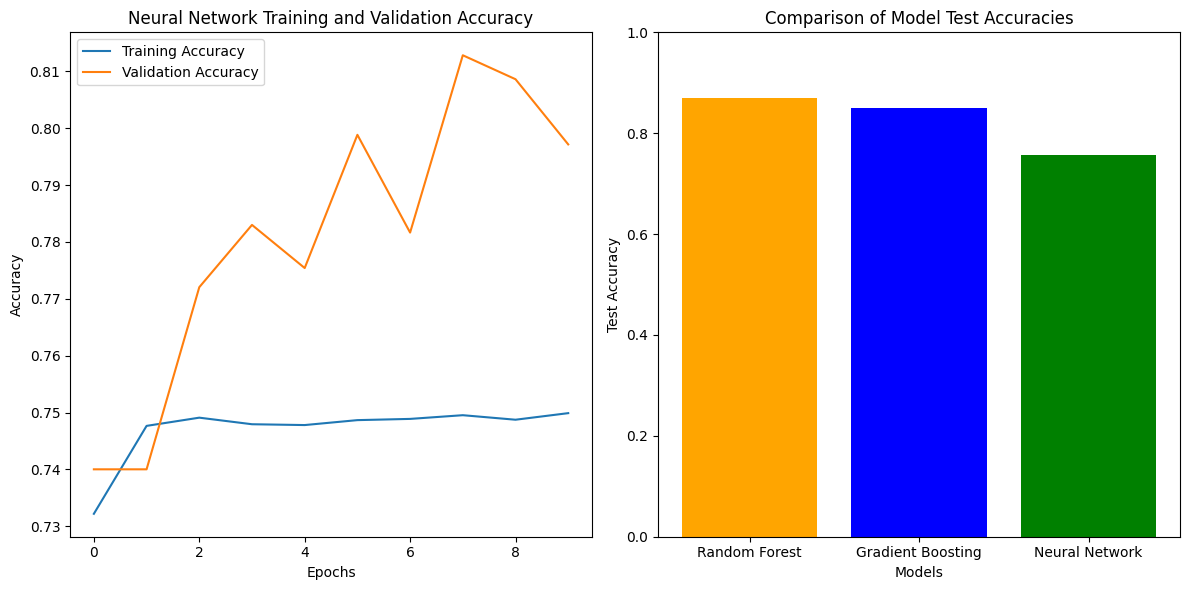

In [ ]:
import matplotlib.pyplot as plt

# Replace these values with your actual test accuracies
rf_test_accuracy = 0.869
gb_test_accuracy = 0.850
nn_test_accuracy = 0.756

# Plot training history for the neural network model
plt.figure(figsize=(12, 6))

# Neural Network Training and Validation Accuracy
plt.subplot(1, 2, 1)
# Replace these lines with actual data from your training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Training and Validation Accuracy')
plt.legend()

# Bar chart for model comparison
plt.subplot(1, 2, 2)
models = ['Random Forest', 'Gradient Boosting', 'Neural Network']
accuracies = [rf_test_accuracy, gb_test_accuracy, nn_test_accuracy]

plt.bar(models, accuracies, color=['orange', 'blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Test Accuracies')
plt.ylim([0, 1])  # Ensure y-axis ranges from 0 to 1

plt.tight_layout()
plt.show()
